# Importing Required Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")

# Reading Data

In [2]:
train_df = pd.read_csv("../Data/train.csv")
test_df = pd.read_csv("../Data/train.csv")

train_features_df = pd.read_csv("../Data/train_features_df.csv")
test_features_df = pd.read_csv("../Data/test_features_df.csv")

In [3]:
train_features_df.head()

,OverallQual,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageFinish,YearDiff,YearRemodAdd,1stFlrSF,...,GarageType,OverallCond,LotArea,BsmtFinSF1,LotFrontage,2ndFlrSF,SalePrice,no_garage,is_BsmtFinSF1_0,is_2ndFlrSF_0
0,7,2,6,3,2,1,2,2.472136,87.509776,6.752270,...,5,8,9.041922,706,4.174387,854,208500,0,0,0
1,6,1,3,3,1,3,2,9.135529,86.904443,7.140453,...,5,4,9.169518,978,4.382027,0,181500,0,0,1
2,7,2,6,3,2,3,2,3.291503,87.487429,6.824374,...,5,8,9.328123,486,4.219508,866,223500,0,0,0
3,7,1,2,2,2,4,1,17.078784,86.769364,6.867974,...,2,8,9.164296,216,4.094345,756,140000,0,0,0
4,8,2,6,3,2,3,2,3.656854,87.442719,7.043160,...,5,8,9.565214,655,4.430817,1053,250000,0,0,0


In [4]:
test_features_df.head()

,OverallQual,ExterQual,Foundation,BsmtQual,KitchenQual,FireplaceQu,GarageFinish,YearDiff,YearRemodAdd,1stFlrSF,...,BsmtFinType1,GarageType,OverallCond,LotArea,BsmtFinSF1,LotFrontage,2ndFlrSF,no_garage,is_BsmtFinSF1_0,is_2ndFlrSF_0
0,5,1,3,2,1,1,1,12.000000,86.566359,6.797940,...,3,5,6,9.360655,468.0,4.382027,0,0,0,1
1,6,1,3,2,2,1,1,12.422205,86.498588,7.192182,...,4,5,6,9.565704,923.0,4.394449,0,0,0,1
2,5,1,6,3,1,3,3,5.211103,87.397987,6.833032,...,6,5,5,9.534595,791.0,4.304065,701,0,0,0
3,6,1,6,2,2,4,3,4.928203,87.397987,6.830874,...,6,5,6,9.208138,602.0,4.356709,678,0,0,0
4,8,2,6,3,2,1,2,6.485281,87.263654,7.154615,...,4,5,5,8.518193,263.0,3.761200,0,0,0,1


# Linear Regression

## Full Dataset

### Unscaled

#### Train Test Split

In [5]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

#### Linear Regression Model

In [6]:
base_lr = LinearRegression().fit(X_train, np.log(y_train))
y_hat = base_lr.predict(X_test)

#### RMSLE

In [7]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat)))

0.14414189518443657

### Scaled

#### Train Test Split

In [8]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [9]:
scaler_X = MinMaxScaler().fit(X_train)
X_train_sc = scaler_X.transform(X_train)
X_test_sc = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(np.log(y_train).reshape(-1, 1))
y_train_sc = scaler_y.transform(np.log(y_train).reshape(-1, 1))
y_test_sc = scaler_y.transform(np.log(y_test).reshape(-1, 1))

#### Linear Regression Model

In [10]:
base_lr_sc = LinearRegression().fit(X_train_sc, y_train_sc)
y_hat_sc = base_lr_sc.predict(X_test_sc)

#### RMSLE

In [11]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(scaler_y.inverse_transform(y_hat_sc))))

0.14414189518443574

## High Features

### Identifying High Features

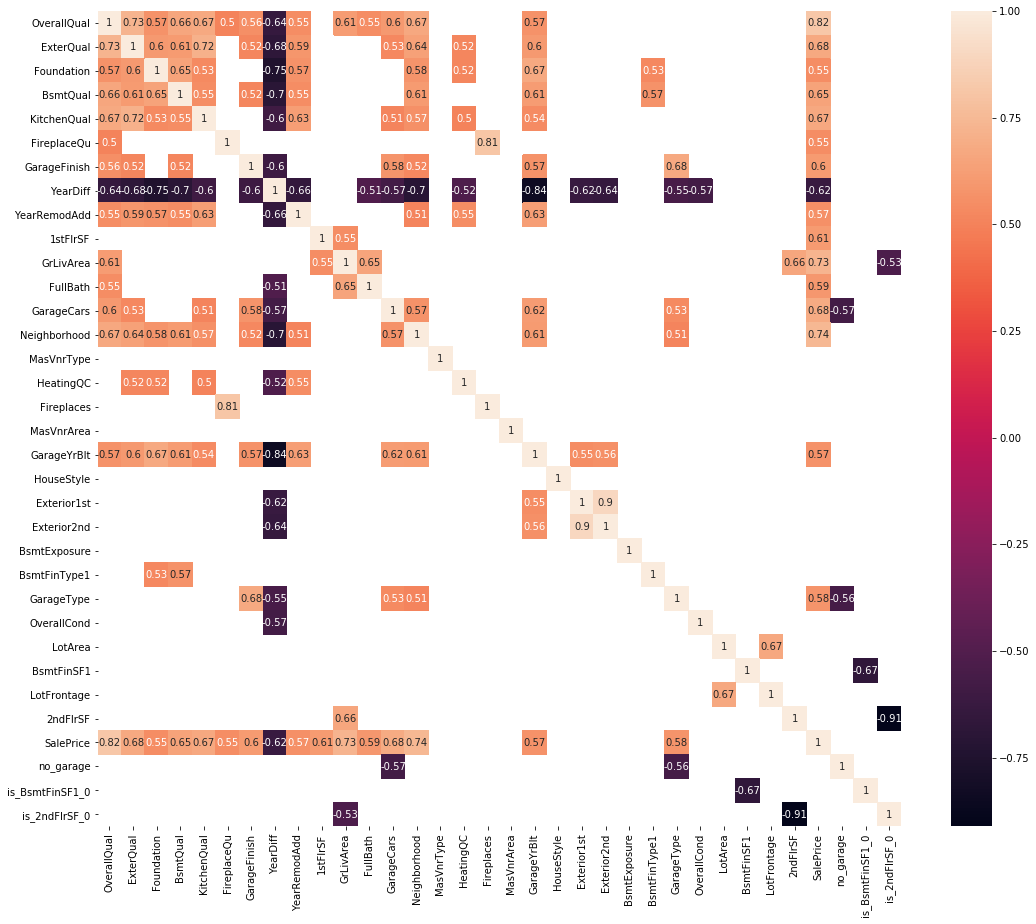

In [12]:
fig, ax = plt.subplots(figsize = (18, 15))

df = train_features_df.copy()
df["SalePrice"] = np.log(df["SalePrice"])

sns.heatmap(df.corr(), 
            annot = True, 
            mask = ((df.corr() < 0.5) & (df.corr() > -0.5)), 
            ax = ax)
plt.show()

In [13]:
features = [
    "OverallQual", "ExterQual", "Foundation", "BsmtQual", "KitchenQual",
    "FireplaceQu", "GarageFinish", "YearDiff", "YearRemodAdd", "1stFlrSF", 
    "GrLivArea", "FullBath", "GarageCars", "Neighborhood", "GarageYrBlt", "GarageType"
]

factors = ["no_garage", "is_BsmtFinSF1_0", "is_2ndFlrSF_0"]

### Unscaled

#### Train Test Split

In [14]:
X, y = train_features_df[features+factors], train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

#### Linear Regression Model

In [15]:
base_lr_high = LinearRegression().fit(X_train, np.log(y_train))
y_hat_high = base_lr_high.predict(X_test)

#### RMSLE

In [16]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat_high)))

0.14794702106212904

### Scaled

#### Train Test Split

In [17]:
X, y = train_features_df[features + factors], train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [18]:
scaler_X = MinMaxScaler().fit(X_train)
X_train_sc = scaler_X.transform(X_train)
X_test_sc = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(np.log(y_train).reshape(-1, 1))
y_train_sc = scaler_y.transform(np.log(y_train).reshape(-1, 1))
y_test_sc = scaler_y.transform(np.log(y_test).reshape(-1, 1))

#### Linear Regression Model

In [19]:
base_lr_high_sc = LinearRegression().fit(X_train_sc, y_train_sc)
y_hat_high_sc = base_lr_high_sc.predict(X_test_sc)

#### RMSLE

In [20]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(scaler_y.inverse_transform(y_hat_high_sc))))

0.147947021062129

## High+Medium Features

### Identifying High+Medium Features

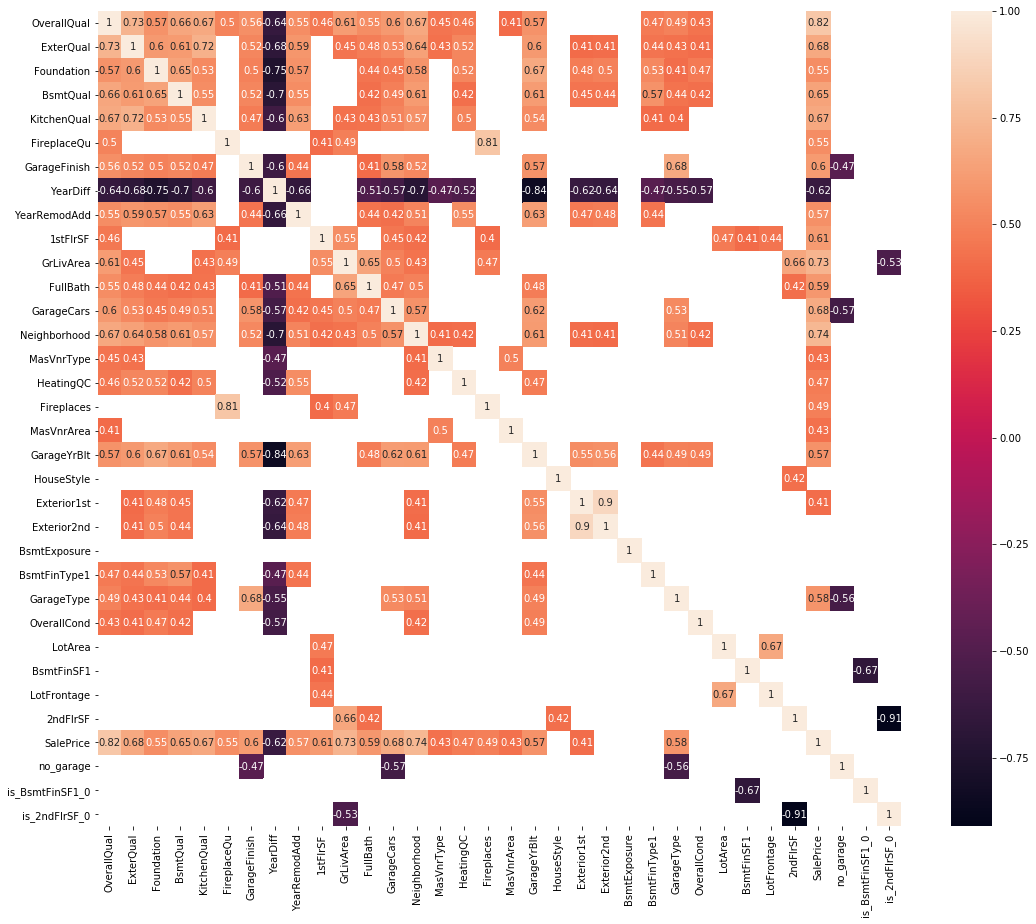

In [21]:
fig, ax = plt.subplots(figsize = (18, 15))

df = train_features_df.copy()
df["SalePrice"] = np.log(df["SalePrice"])

sns.heatmap(df.corr(), 
            annot = True, 
            mask = ((df.corr() < 0.4) & (df.corr() > -0.4)), 
            ax = ax)
plt.show()

In [22]:
features = [
    "OverallQual", "ExterQual", "Foundation", "BsmtQual", "KitchenQual",
    "FireplaceQu", "GarageFinish", "YearDiff", "YearRemodAdd", "1stFlrSF", 
    "GrLivArea", "FullBath", "GarageCars", "Neighborhood", "GarageYrBlt",
    "MasVnrType", "HeatingQC", "Fireplaces", "MasVnrArea", "Exterior1st", "GarageType"
]

factors = ["no_garage", "is_BsmtFinSF1_0", "is_2ndFlrSF_0"]

### Unscaled

#### Train Test Split

In [23]:
X, y = train_features_df[features+factors], train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

#### Linear Regression Model

In [24]:
base_lr_high_med = LinearRegression().fit(X_train, np.log(y_train))
y_hat_high_med = base_lr_high_med.predict(X_test)

#### RMSLE

In [25]:
np.sqrt(mean_squared_log_error(y_true = y_test, y_pred = np.exp(y_hat_high_med)))

0.1459405348462431

### Scaled

#### Train Test Split

In [26]:
X, y = train_features_df[features + factors], train_features_df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.2, random_state = 42)

In [27]:
scaler_X = MinMaxScaler().fit(X_train)
X_train_sc = scaler_X.transform(X_train)
X_test_sc = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(np.log(y_train).reshape(-1, 1))
y_train_sc = scaler_y.transform(np.log(y_train).reshape(-1, 1))
y_test_sc = scaler_y.transform(np.log(y_test).reshape(-1, 1))

#### Linear Regression Model

In [28]:
base_lr_high_med_sc = LinearRegression().fit(X_train_sc, y_train_sc)
y_hat_high_med_sc = base_lr_high_med_sc.predict(X_test_sc)

#### RMSLE

In [29]:
np.sqrt(mean_squared_log_error(y_true = y_test, 
                               y_pred = np.exp(scaler_y.inverse_transform(y_hat_high_med_sc))))

0.14594053484624206

# Submission

## All features

### Unscaled

#### Training Model

In [30]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]
sub0_model = LinearRegression().fit(X.values, np.log(y.values))
preds = sub0_model.predict(test_features_df.values)

#### Building .csv file

In [31]:
sub0_base_lr_model = pd.read_csv("../Data/sample_submission.csv")
sub0_base_lr_model["SalePrice"] = np.exp(preds)
sub0_base_lr_model.to_csv("sub0_base_lr_model_unscaled.csv", index = False)

### Scaled

#### Training Model

In [32]:
X, y = train_features_df.drop(["SalePrice"], axis = 1), train_features_df["SalePrice"]

scaler_X = MinMaxScaler().fit(X.values)
X_sc = scaler_X.transform(X.values)

scaler_y = MinMaxScaler().fit(np.log(y).values.reshape((-1, 1)))
y_sc = scaler_y.transform(np.log(y).values.reshape((-1, 1)))

sub0_model = LinearRegression().fit(X_sc, y_sc)
preds = sub0_model.predict(scaler_X.transform(test_features_df.values))

#### Building .csv file

In [33]:
sub0_base_lr_model = pd.read_csv("../Data/sample_submission.csv")
sub0_base_lr_model["SalePrice"] = np.exp(scaler_y.inverse_transform(preds))
sub0_base_lr_model.to_csv("sub0_base_lr_model_scaled.csv", index = False)

## High features

### Features

In [34]:
features = [
    "OverallQual", "ExterQual", "Foundation", "BsmtQual", "KitchenQual",
    "FireplaceQu", "GarageFinish", "YearDiff", "YearRemodAdd", "1stFlrSF", 
    "GrLivArea", "FullBath", "GarageCars", "Neighborhood", "GarageYrBlt", "GarageType"
]

factors = ["no_garage", "is_BsmtFinSF1_0", "is_2ndFlrSF_0"]

### Training Model

In [35]:
X, y = train_features_df[features + factors], train_features_df["SalePrice"]
sub0_model = LinearRegression().fit(X.values, np.log(y).values)
preds = sub0_model.predict(test_features_df[features + factors].values)

### Building .csv file

In [36]:
sub0_base_lr_model = pd.read_csv("../Data/sample_submission.csv")
sub0_base_lr_model["SalePrice"] = np.exp(preds)
sub0_base_lr_model.to_csv("sub0_base_lr_model_high.csv", index = False)

## High+Medium features

### Features

In [37]:
features = [
    "OverallQual", "ExterQual", "Foundation", "BsmtQual", "KitchenQual",
    "FireplaceQu", "GarageFinish", "YearDiff", "YearRemodAdd", "1stFlrSF", 
    "GrLivArea", "FullBath", "GarageCars", "Neighborhood", "GarageYrBlt",
    "MasVnrType", "HeatingQC", "Fireplaces", "MasVnrArea", "Exterior1st", "GarageType"
]

factors = ["no_garage", "is_BsmtFinSF1_0", "is_2ndFlrSF_0"]

### Training Model

In [38]:
X, y = train_features_df[features + factors], train_features_df["SalePrice"]
sub0_model = LinearRegression().fit(X.values, np.log(y).values)
preds = sub0_model.predict(test_features_df[features + factors].values)

### Building .csv file

In [39]:
sub0_base_lr_model = pd.read_csv("../Data/sample_submission.csv")
sub0_base_lr_model["SalePrice"] = np.exp(preds)
sub0_base_lr_model.to_csv("sub0_base_lr_model_high_med.csv", index = False)

# Conclusion

- Use All features
- No need for Scaling